# Jupyter Notebook for Compiling The University of Alabama Thesis Chemical Structure Data

### Vincent F. Scalfani

In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import PandasTools
#PandasTools.RenderImagesInAllDataFrames(images=True)

from rdkit.Chem import Draw
from rdkit import DataStructs
import numpy
import pandas as pd

import rdkit
rdkit.__version__

'2019.09.2'

In [19]:
# Many thanks to Chris Swain's tutorial linked below, which helped me adapt the 
# the code for the thesis indexing project:
# https://www.macinchem.org/reviews/molsimilar/SimilarMyMolecules.html

In [20]:
# Import the thesis chemical structure data

# The file names are in the format:
# year_author_UACatalogAccession#_substances_raw.csv (e.g.,1995_Battle_W_UA.849024_substances_raw.csv)

# The format of the data within the file is as follows:
# PUBCHEM_EXT_DATASOURCE_SMILES	PUBCHEM_EXT_DATASOURCE_REGID	PUBCHEM_SUBSTANCE_SYNONYM	PUBCHEM_SUBSTANCE_COMMENT	PUBCHEM_EXT_SUBSTANCE_URL
# [H]C#CB1OC(C)(C)C(C)(C)O1	UALIB-270	Pinacol ethynylborate	Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.	https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest
# CC1(C)C(C)(C)OB(C2=CC(C3=CC=C(OC)C=C3)=NO2)O1	UALIB-271	3-(4’Methoxyphenyl)-5-(pinacolboronate)-isoxazole	Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.	https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest
# CC1(C)C(C)(C)OB(C2=CC(C3=CC=C(Br)C=C3)=NO2)O1	UALIB-272	3-(4’-Bromophenyl)-5-(pinacolboronate)-isoxazole	Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.	https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest
# ...

file_name_raw = 'test_substances_raw.csv' # change this line each time, that's it. 
thesis_df = pd.read_csv(file_name_raw, sep = '\t')

# view first 10 rows
thesis_df.head(10)

,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_SUBSTANCE_SYNONYM,PUBCHEM_SUBSTANCE_COMMENT,PUBCHEM_EXT_SUBSTANCE_URL
0,[H]C#CB1OC(C)(C)C(C)(C)O1,UALIB-270,Pinacol ethynylborate,"Battle, W. The Synthesis of 5-(Boronic Ester)-...",https://search.ebscohost.com/login.aspx?direct...
1,CC1(C)C(C)(C)OB(C2=CC(C3=CC=C(OC)C=C3)=NO2)O1,UALIB-271,3-(4’Methoxyphenyl)-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-...",https://search.ebscohost.com/login.aspx?direct...
2,CC1(C)C(C)(C)OB(C2=CC(C3=CC=C(Br)C=C3)=NO2)O1,UALIB-272,3-(4’-Bromophenyl)-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-...",https://search.ebscohost.com/login.aspx?direct...
3,CC1(C)C(C)(C)OB(C2=CC(COCC3=CC=CC=C3)=NO2)O1,UALIB-273,3-(Benzyloxy)methyl-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-...",https://search.ebscohost.com/login.aspx?direct...
4,CC1(C)C(C)(C)OB(C2=CC(C(OCC)=O)=NO2)O1,UALIB-274,3-Ethyloxycarbonyl-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-...",https://search.ebscohost.com/login.aspx?direct...
5,CC1(C)C(C)(C)OB(C2=CC(C)=NO2)O1,UALIB-275,3-Methyl-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-...",https://search.ebscohost.com/login.aspx?direct...
6,CC1(C)C(C)(C)OB(C2=CC(CC)=NO2)O1,UALIB-276,3-Ethyl-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-...",https://search.ebscohost.com/login.aspx?direct...
7,[H][NH+]1CCO[BH-](OCC1)C2=CC(C3=CC=C(OC)C=C3)=NO2,UALIB-277,3-(4’-Methyloxyphenyl)-5-(diethanolaminoboroan...,"Battle, W. The Synthesis of 5-(Boronic Ester)-...",https://search.ebscohost.com/login.aspx?direct...
8,[H][NH+]1CCO[BH-](OCC1)C2=CC(C3=CC=C(Br)C=C3)=NO2,UALIB-278,3-(4’-Bromophenyl)-5-(diethanolaminoboronate)-...,"Battle, W. The Synthesis of 5-(Boronic Ester)-...",https://search.ebscohost.com/login.aspx?direct...
9,[H][NH+]1CCO[BH-](OCC1)C2=CC(COCC3=CC=CC=C3)=NO2,UALIB-279,3-(Benzyloxy)methyl-5-(diethanolaminoboronate)...,"Battle, W. The Synthesis of 5-(Boronic Ester)-...",https://search.ebscohost.com/login.aspx?direct...


In [21]:
# Add RDKit Molecular Objects
PandasTools.AddMoleculeColumnToFrame(thesis_df,'PUBCHEM_EXT_DATASOURCE_SMILES','Structure', includeFingerprints=False)
print([str(x) for x in  thesis_df.columns])

['PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_EXT_DATASOURCE_REGID', 'PUBCHEM_SUBSTANCE_SYNONYM', 'PUBCHEM_SUBSTANCE_COMMENT', 'PUBCHEM_EXT_SUBSTANCE_URL', 'Structure']


,Structure,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_SUBSTANCE_SYNONYM,PUBCHEM_SUBSTANCE_COMMENT,PUBCHEM_EXT_SUBSTANCE_URL
0,,UALIB-270,[H]C#CB1OC(C)(C)C(C)(C)O1,Pinacol ethynylborate,"Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.","https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest"
1,,UALIB-271,CC1(C)C(C)(C)OB(C2=CC(C3=CC=C(OC)C=C3)=NO2)O1,3-(4’Methoxyphenyl)-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.","https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest"
2,,UALIB-272,CC1(C)C(C)(C)OB(C2=CC(C3=CC=C(Br)C=C3)=NO2)O1,3-(4’-Bromophenyl)-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.","https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest"
3,,UALIB-273,CC1(C)C(C)(C)OB(C2=CC(COCC3=CC=CC=C3)=NO2)O1,3-(Benzyloxy)methyl-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.","https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest"
4,,UALIB-274,CC1(C)C(C)(C)OB(C2=CC(C(OCC)=O)=NO2)O1,3-Ethyloxycarbonyl-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.","https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest"
5,,UALIB-275,CC1(C)C(C)(C)OB(C2=CC(C)=NO2)O1,3-Methyl-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.","https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest"
6,,UALIB-276,CC1(C)C(C)(C)OB(C2=CC(CC)=NO2)O1,3-Ethyl-5-(pinacolboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.","https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest"
7,,UALIB-277,[H][NH+]1CCO[BH-](OCC1)C2=CC(C3=CC=C(OC)C=C3)=NO2,3-(4’-Methyloxyphenyl)-5-(diethanolaminoboroante)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Alabama, 1995.","https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.849024&site=eds-live&scope=site&custid=s4594951&groupid=main&profid=eds&authtype=ip,guest"
8,,UALIB-278,[H][NH+]1CCO[BH-](OCC1)C2=CC(C3=CC=C(Br)C=C3)=NO2,3-(4’-Bromophenyl)-5-(diethanolaminoboronate)-isoxazole,"Battle, W. The Synthesis of 5-(Boronic Ester)-Isoxazoles and Their use in Palladium-Catalyzed Cross-Coupling Reactions with Iodobenzene. M.A. Thesis, The University of Al
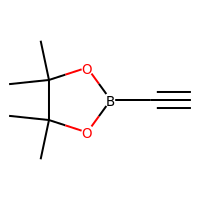
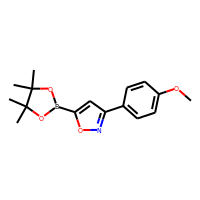
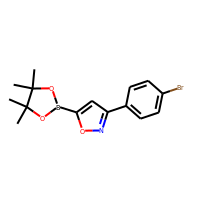
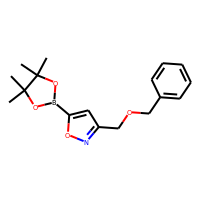
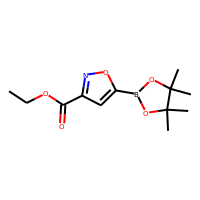
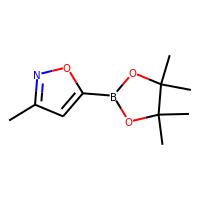
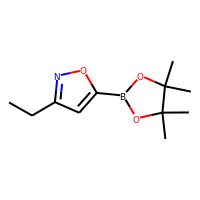
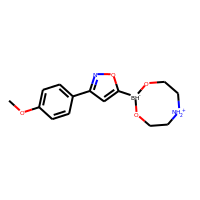
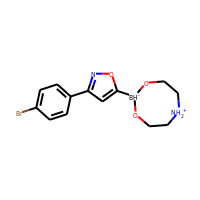
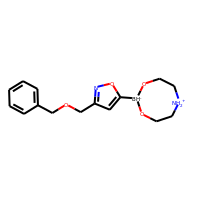
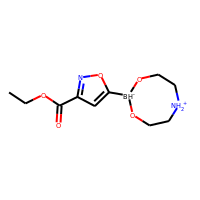
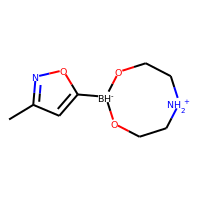
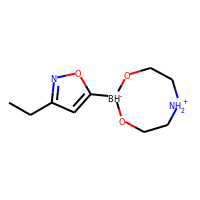
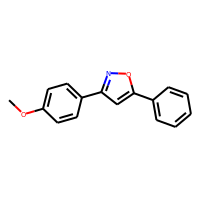
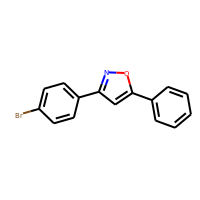
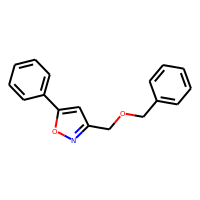
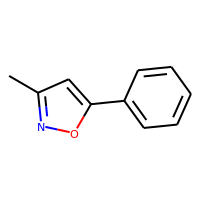
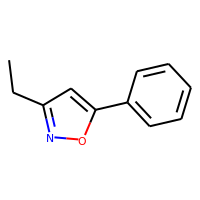
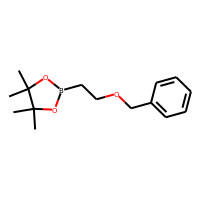
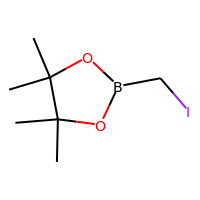
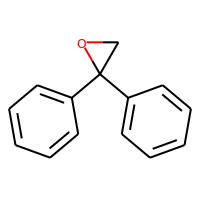
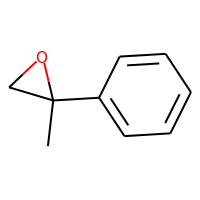
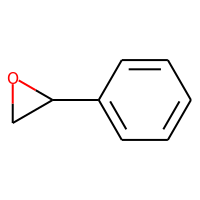
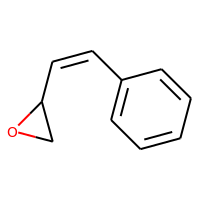

In [22]:
# rearrange table order
thesis_df = thesis_df[['Structure',
 'PUBCHEM_EXT_DATASOURCE_REGID',
 'PUBCHEM_EXT_DATASOURCE_SMILES',
 'PUBCHEM_SUBSTANCE_SYNONYM',
 'PUBCHEM_SUBSTANCE_COMMENT',
 'PUBCHEM_EXT_SUBSTANCE_URL']]

# Display table
# thesis_df
# fixes mol display in dataframes (RDKit Issue# 2673)
from IPython.display import HTML;HTML(thesis_df.head(len(thesis_df.index)).to_html()) 

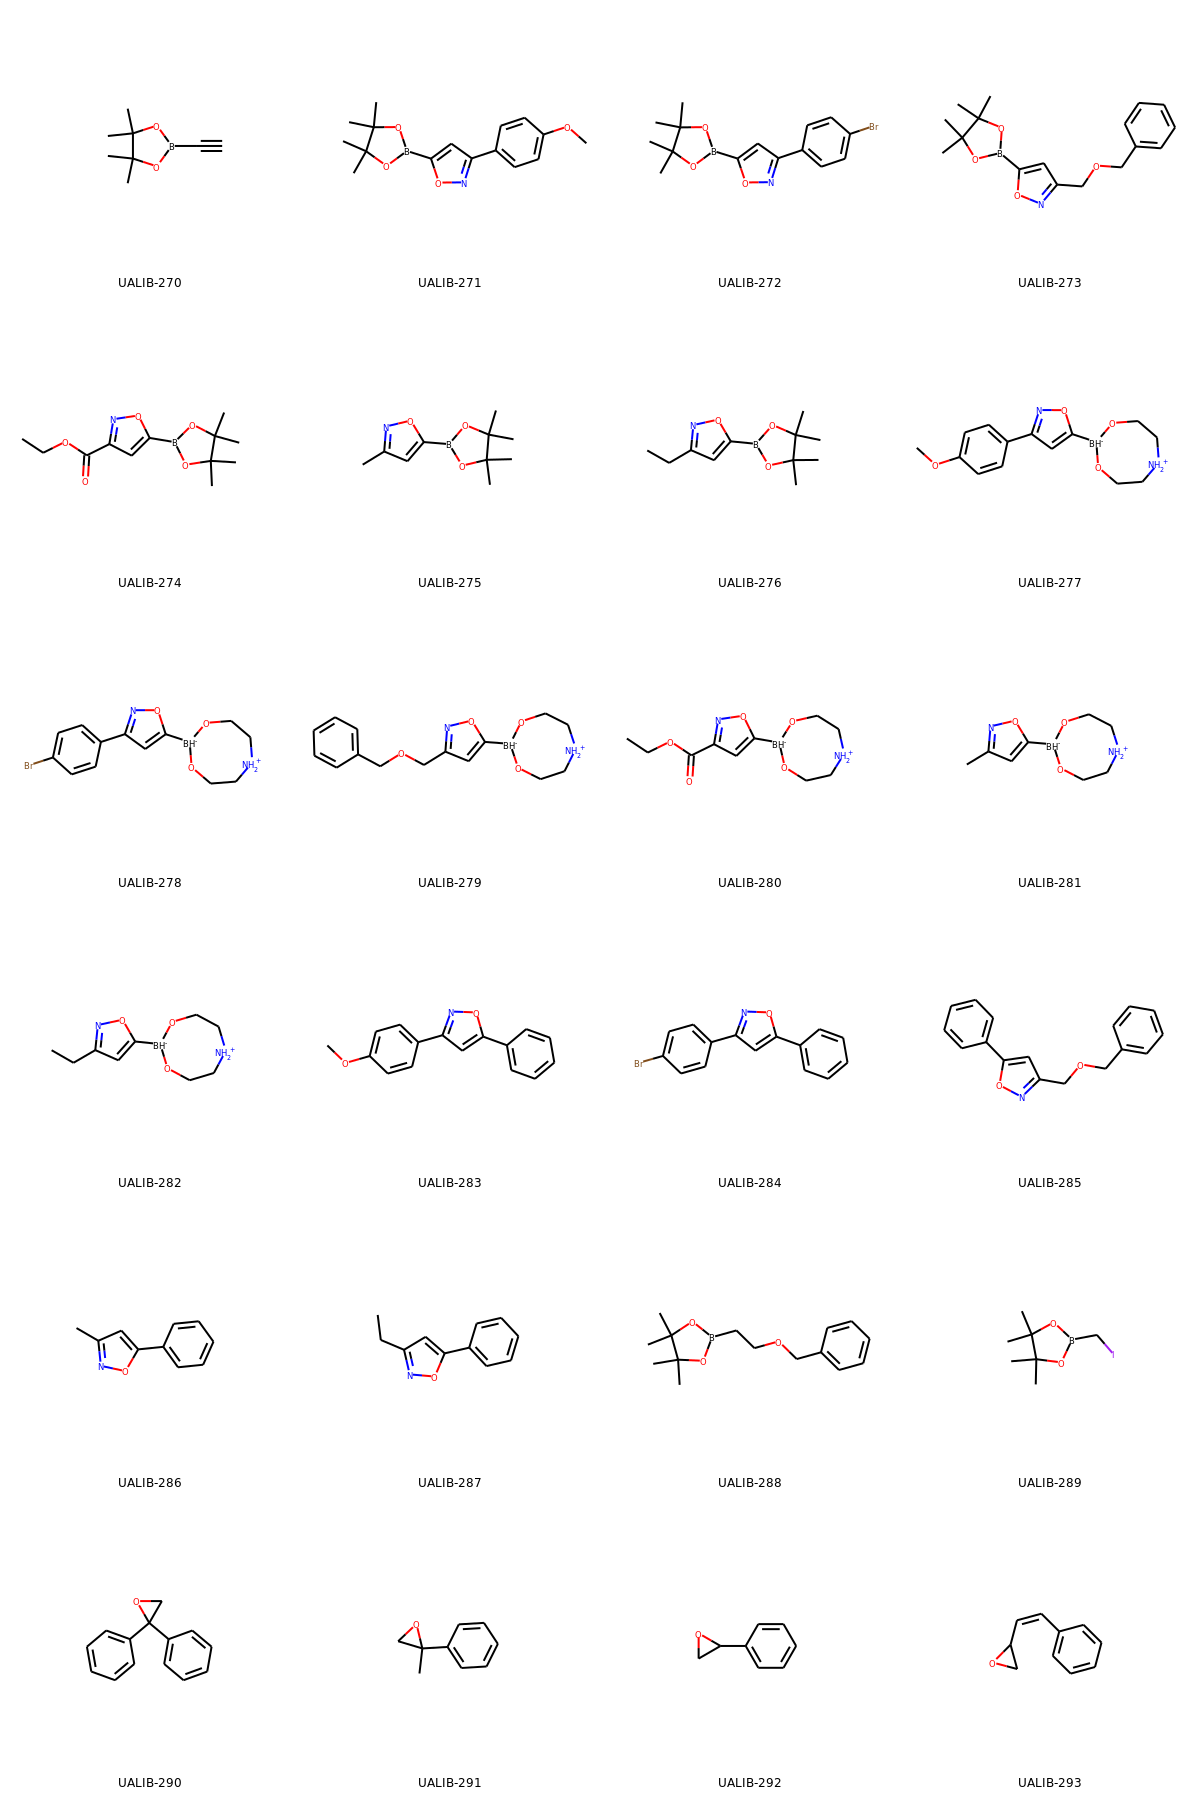

In [23]:
# we can also display just the molecules like this:
PandasTools.FrameToGridImage(thesis_df,column= 'Structure', molsPerRow=4,subImgSize=(300,300),legendsCol="PUBCHEM_EXT_DATASOURCE_REGID")

In [24]:
# Now we need to caluclate the InChI and add to thesis_df
inchi_list = []
for mol in thesis_df['Structure']:
    inchi = Chem.MolToInchi(mol)
    inchi_list.append(inchi)

# add to dataframe
thesis_df['PUBCHEM_EXT_DATASOURCE_INCHI']=inchi_list

In [25]:
# Repeat for InChIKey 
ik_list = []
for mol in thesis_df['Structure']:
    ik = Chem.MolToInchiKey(mol)
    ik_list.append(ik)

# add to dataframe
thesis_df['INCHIKEY']=ik_list

In [26]:
# Export the SDF for PubChem upload

# create the file name
file_name_sdf = file_name_raw.replace('raw.csv','rdkit2019092.sdf')

PandasTools.WriteSDF(thesis_df,file_name_sdf, molColName='Structure', 
    properties=['PUBCHEM_EXT_DATASOURCE_REGID',
                'PUBCHEM_EXT_DATASOURCE_SMILES',
                'PUBCHEM_SUBSTANCE_SYNONYM',
                'PUBCHEM_SUBSTANCE_COMMENT',
                'PUBCHEM_EXT_SUBSTANCE_URL',
                'PUBCHEM_EXT_DATASOURCE_INCHI',])

In [27]:
# Export to csv (tab seperated) without RDKit mol object image

# create the file name
file_name_csv = file_name_raw.replace('raw.csv','rdkit2019092.csv')

sel_cols = ['PUBCHEM_EXT_DATASOURCE_REGID',
                'PUBCHEM_EXT_DATASOURCE_SMILES',
                'PUBCHEM_SUBSTANCE_SYNONYM',
                'PUBCHEM_SUBSTANCE_COMMENT',
                'PUBCHEM_EXT_SUBSTANCE_URL',
                'PUBCHEM_EXT_DATASOURCE_INCHI',
                'INCHIKEY']

thesis_df.to_csv(file_name_csv, sep ='\t', index=False, columns = sel_cols)

In [8]:
# Create the SDfile for all indexed structures (run this after updating
# UALIB_Chemical_Structures_REGID.csv)

All_df = pd.read_csv('UALIB_Chemical_Structures_REGID.csv', sep = '\t')

# view first 10 rows
All_df.head(10)

,PUBCHEM_EXT_DATASOURCE_REGID,INCHIKEY,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_EXT_DATASOURCE_INCHI,PUBCHEM_SUBSTANCE_COMMENT,PUBCHEM_EXT_SUBSTANCE_URL,Deposited on PubChem Date,SID,CID,New to PubChem when desposited?,Date updated,updated CID,Change in SID-CID Association?,Duplicate Notes
0,UALIB-1,AXUOFAQEYHGSQH-UHFFFAOYSA-L,Cl[Pd](Cl)([P](C(C)(C)C)(C(C)(C)C)CC1=CC=CC=C1...,"InChI=1S/2C15H25P.2ClH.Pd/c2*1-14(2,3)16(15(4,...","Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,15-Aug-17,340507449,129318068,Yes,NaN,NaN,NaN,NaN
1,UALIB-2,MVFIXGKGXUTHNF-UHFFFAOYSA-N,CC([PH+](C(C)(C)C)CC1=CC=CC=C1)(C)C.[Br-],"InChI=1S/C15H25P.BrH/c1-14(2,3)16(15(4,5)6)12-...","Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,15-Aug-17,340507450,129318069,Yes,NaN,NaN,NaN,NaN
2,UALIB-3,PTYMTLZROYIEAR-UHFFFAOYSA-N,[PH+](C1CCCCC1)(C2CCCCC2)CC3=CC=CC=C3.[Br-],InChI=1S/C19H29P.BrH/c1-4-10-17(11-5-1)16-20(1...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,15-Aug-17,340507451,129318070,Yes,NaN,NaN,NaN,NaN
3,UALIB-4,ACCXUCPRWSYRRY-UHFFFAOYSA-N,[PH+](C12CC3CC(C2)CC(C3)C1)(C45CC6CC(C5)CC(C6)...,InChI=1S/C27H37P.BrH/c1-2-4-19(5-3-1)18-28(26-...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,15-Aug-17,340507452,11271419,No,NaN,NaN,NaN,NaN
4,UALIB-5,DYTXAAAJICVFDI-UHFFFAOYSA-N,CC(P(C(C)(C)C)CCC1=CC=CC=C1)(C)C,"InChI=1S/C16H27P/c1-15(2,3)17(16(4,5)6)13-12-1...","Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,15-Aug-17,340507453,5248532,No,NaN,NaN,NaN,NaN
5,UALIB-6,CDKUYUULLQLNFF-UHFFFAOYSA-N,CC1=C(C2=CC=CC=C2)C(C)=CC(C)=C1,InChI=1S/C15H16/c1-11-9-12(2)15(13(3)10-11)14-...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,15-Aug-17,340507454,19876,No,NaN,NaN,NaN,NaN
6,UALIB-7,LKNANEBKEYKHMI-UHFFFAOYSA-N,CC1=C(C2=CC=CC=C2C)C(C)=CC(C)=C1,InChI=1S/C16H18/c1-11-9-13(3)16(14(4)10-11)15-...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,15-Aug-17,340507455,11680084,No,NaN,NaN,NaN,NaN
7,UALIB-8,HKTCLPBBJDIBGF-UHFFFAOYSA-N,CC(C1=CC=CC=C1C2=CC=CC=C2)C,InChI=1S/C15H16/c1-12(2)14-10-6-7-11-15(14)13-...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,15-Aug-17,340507456,123382,No,NaN,NaN,NaN,NaN
8,UALIB-9,RZCMFGVKVUYCQG-UHFFFAOYSA-N,CC1=CC=CC=C1C2=CC=CC=C2C(C)C,InChI=1S/C16H18/c1-12(2)14-9-6-7-11-16(14)15-1...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,15-Aug-17,340507457,21285396,No,NaN,NaN,NaN,NaN
9,UALIB-10,LDHISJKTXNVZLF-UHFFFAOYSA-N,CC1=CC=CC=C1C2=CC=CC=C2C3=CC=CC=C3,InChI=1S/C19H16/c1-15-9-5-6-12-17(15)19-14-8-7...,"Moore, J. N. Synthesis and application of ster...",https://ir.ua.edu/handle/123456789/2050,15-Aug-17,340507458,14900621,No,NaN,NaN,NaN,NaN


In [10]:
# Add RDKit Molecular Objects
PandasTools.AddMoleculeColumnToFrame(All_df,'PUBCHEM_EXT_DATASOURCE_SMILES','Structure', includeFingerprints=False)

# export the sdf
PandasTools.WriteSDF(All_df,'UALIB_Chemical_Structures_REGID.sdf', molColName='Structure', 
    properties=list(All_df.columns))